In [1]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 3.9 MB/s 
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 61 kB 419 kB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 113 kB 47.4 MB/s 
     |████████████████████████████████| 1.6 MB 64.9 MB/s 
     |████████████████████████████████| 11.2 MB 72.4 MB/s 
     |████████████████████████████████| 959 kB 70.5 MB/s 
     |████████████████████████████████| 636 kB 80.2 MB/s 
     |████████████████████████████████| 281 kB 87.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: matpl

In [2]:
!pip install table-evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 7.6 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb

import sdv.demo as demo
from sdv.tabular import CTGAN
from sdv.tabular import TVAE
from table_evaluator import load_data, TableEvaluator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score,\
                            accuracy_score, balanced_accuracy_score,classification_report,\
                            plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_data_vae_entire.csv to synthetic_data_vae_entire.csv


In [ ]:
real_data = pd.read_csv('adult.csv')
real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
#metadata , census_data = demo.load_demo('census', metadata = True)

In [ ]:
#real_data = census_data['census']
#real_data.head()

In [ ]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
#metadata.visualize()

In [ ]:
real_data['income'].value_counts(normalize=True)

<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64

In [ ]:
real_data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
#real_data_subset = real_data.iloc[:15000]

In [ ]:
#real_data_subset['income'].value_counts(normalize=True)

In [ ]:
#real_data_subset['income'].value_counts()

**Build GAN**

In [ ]:
model_gan = CTGAN(
              epochs=500,
              batch_size=200,
              generator_dim=(256, 256, 256),
              discriminator_dim=(256, 256, 256)
            )

In [ ]:
#model_gan.fit(real_data_subset)
model_gan.fit(real_data)

In [ ]:
from google.colab import files
uploaded_synthetic = files.upload()

Saving synthetic_data_gan_entire.csv to synthetic_data_gan_entire.csv


In [ ]:
synthetic_data_gan = pd.read_csv('synthetic_data_gan_entire.csv')
synthetic_data_gan.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,20,Private,433184,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K
1,21,?,267864,Bachelors,13,Separated,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
2,37,Private,255321,9th,6,Divorced,Machine-op-inspct,Unmarried,White,Female,1,0,40,United-States,<=50K
3,46,Self-emp-not-inc,71493,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,15,0,50,United-States,<=50K
4,47,Private,150837,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,29,United-States,<=50K


In [ ]:
#synthetic_data_gan = model_gan.sample(num_rows=15000)
#synthetic_data_gan.head()

In [ ]:
#synthetic_data_gan['income'].value_counts(normalize=True)

In [ ]:
from sdv.sampling import Condition

In [ ]:
condition_0 = Condition({      
        'income': '<=50K'
          }, num_rows=37155)

condition_1 = Condition({      
        'income': '>50K'
          }, num_rows=11687)

In [ ]:
gan_0 = model_gan.sample_conditions(conditions=[condition_0])
gan_1 = model_gan.sample_conditions(conditions=[condition_1])

Sampling conditions: 100%|██████████| 11687/11687 [00:03<00:00, 2954.98it/s]


In [ ]:
synthetic_data_gan = pd.concat([gan_0,gan_1])
synthetic_data_gan.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,33,Private,276427,HS-grad,9,Never-married,Adm-clerical,Unmarried,Other,Female,6,0,51,Dominican-Republic,<=50K
1,23,Private,249151,Some-college,10,Separated,Other-service,Not-in-family,White,Female,7,1,60,Germany,<=50K
2,37,Private,178929,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
3,28,Private,206282,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
4,18,?,28261,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [ ]:
synthetic_data_gan['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
synthetic_data_gan['income'].value_counts(normalize=True)

<=50K   0.7607
>50K    0.2393
Name: income, dtype: float64

In [ ]:
#from google.colab import drive
#drive.mount('drive')

#synthetic_data_gan.to_csv('/content/drive/My Drive/synthetic_data_gan_entire.csv', encoding='utf-8', index=False)

Mounted at drive


Now, let’s check just how similar the synthetic data is to the real data. For this, we will use table_evaluator⁷ to visualize the difference between the fake and real data.

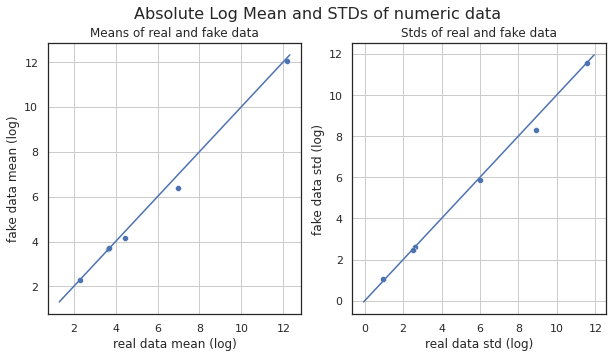

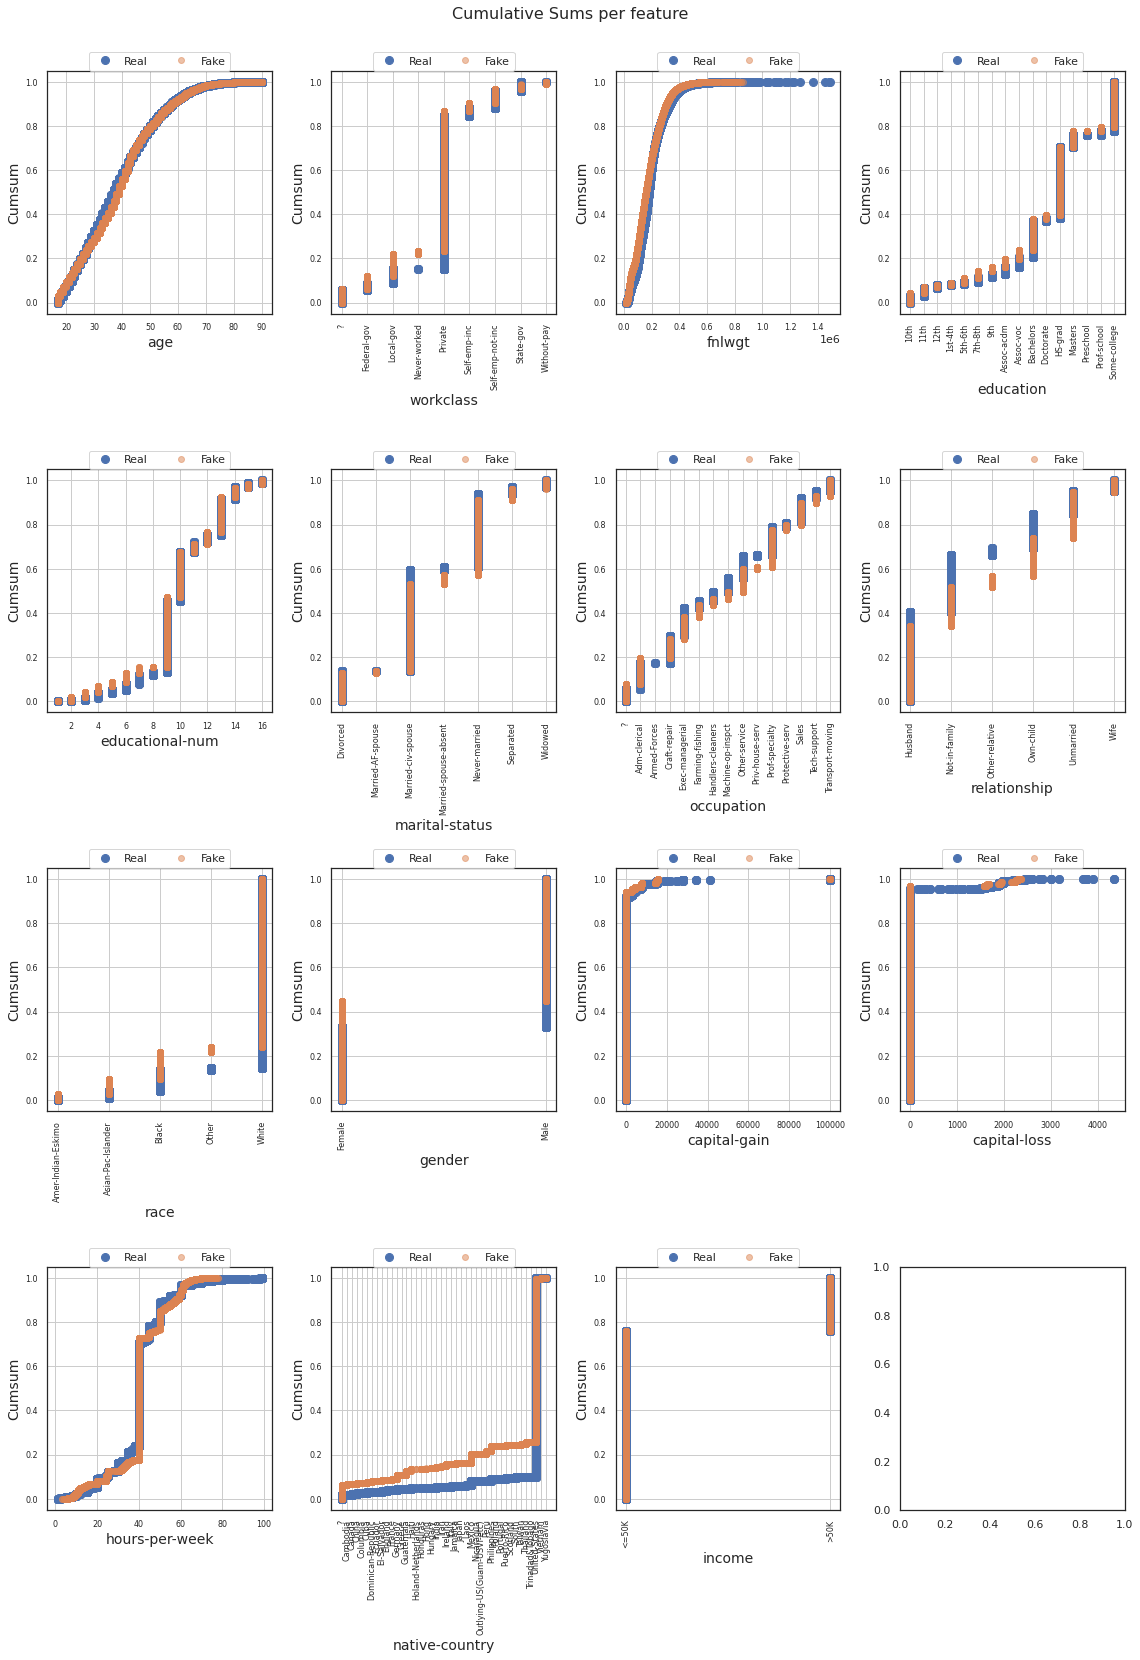

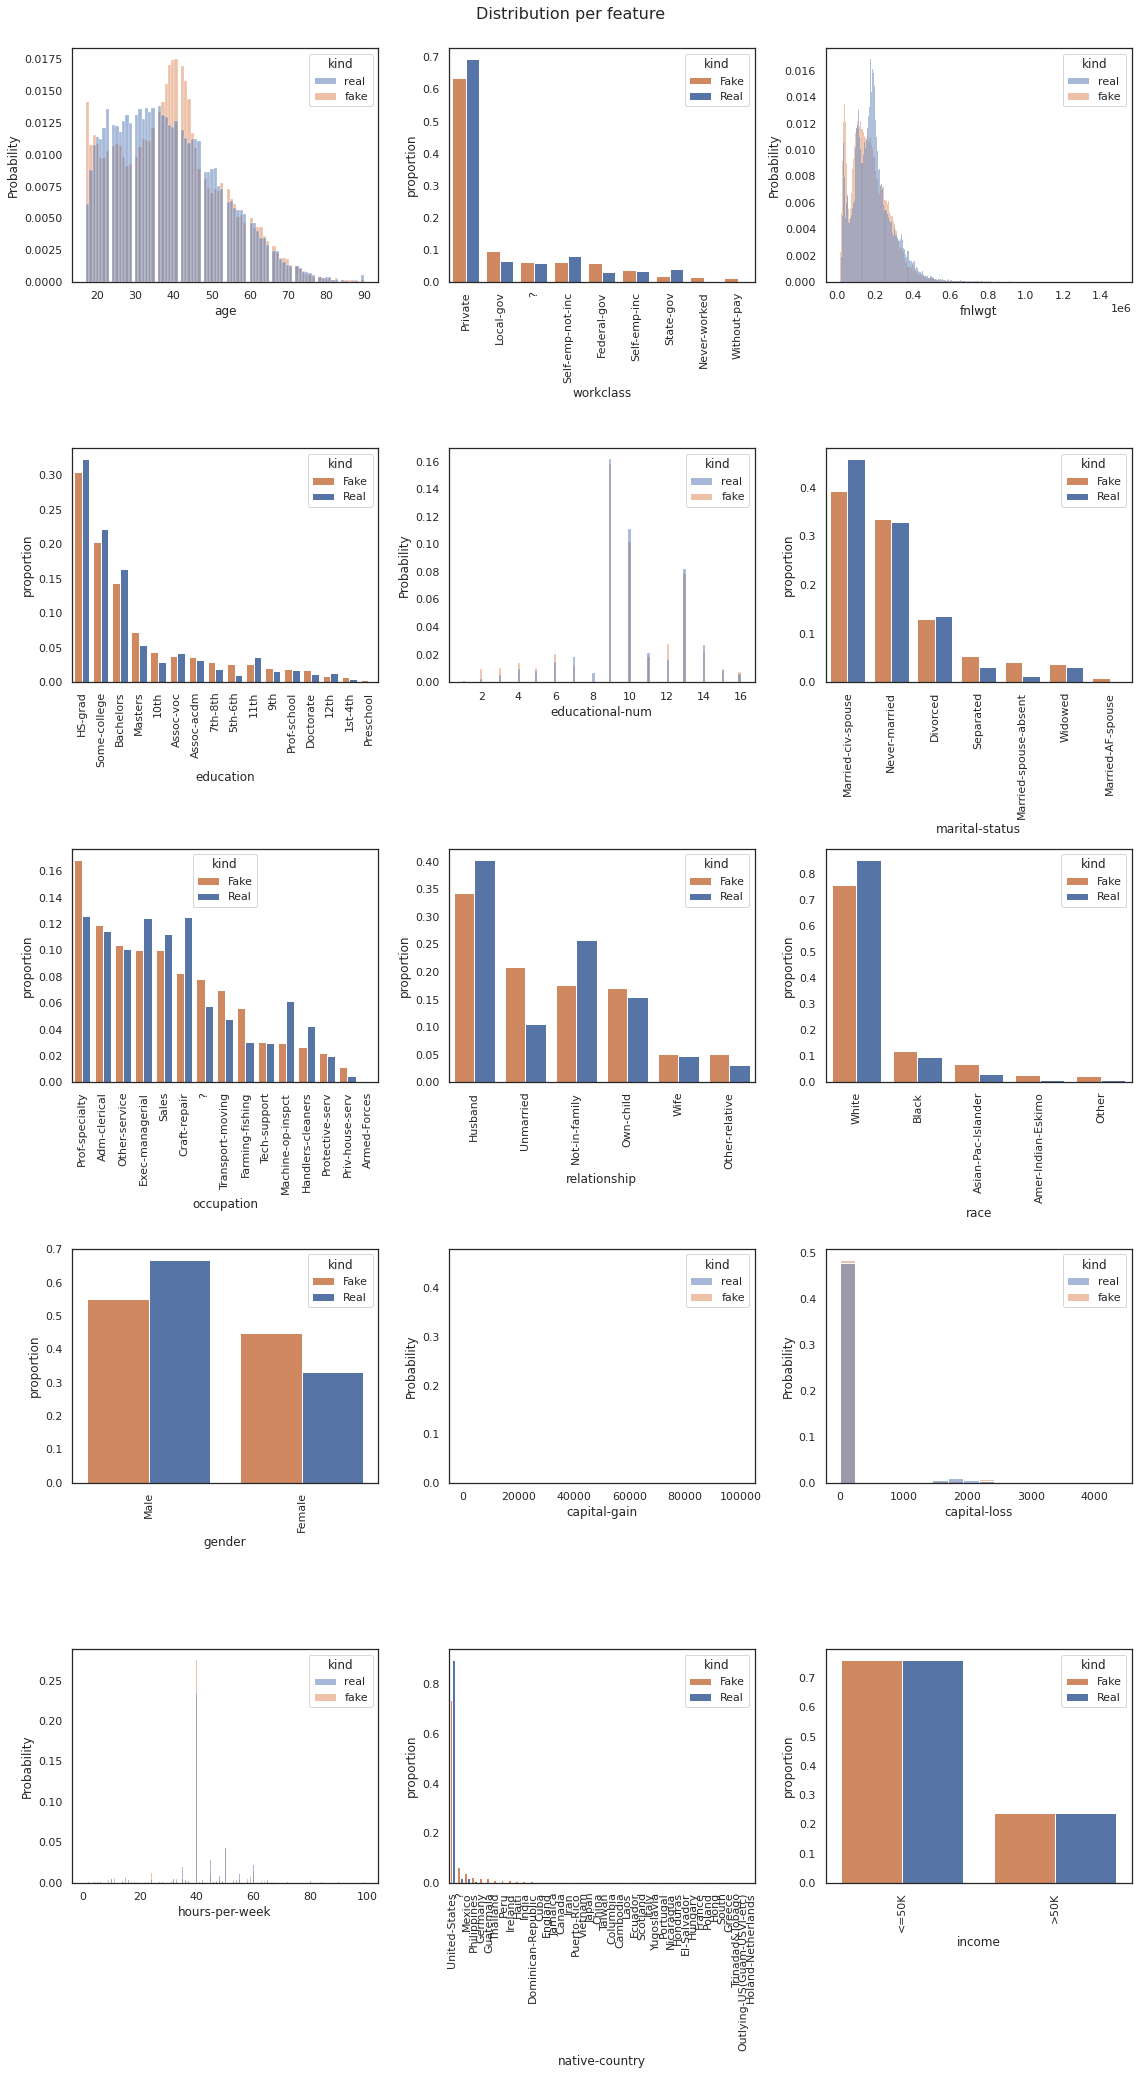

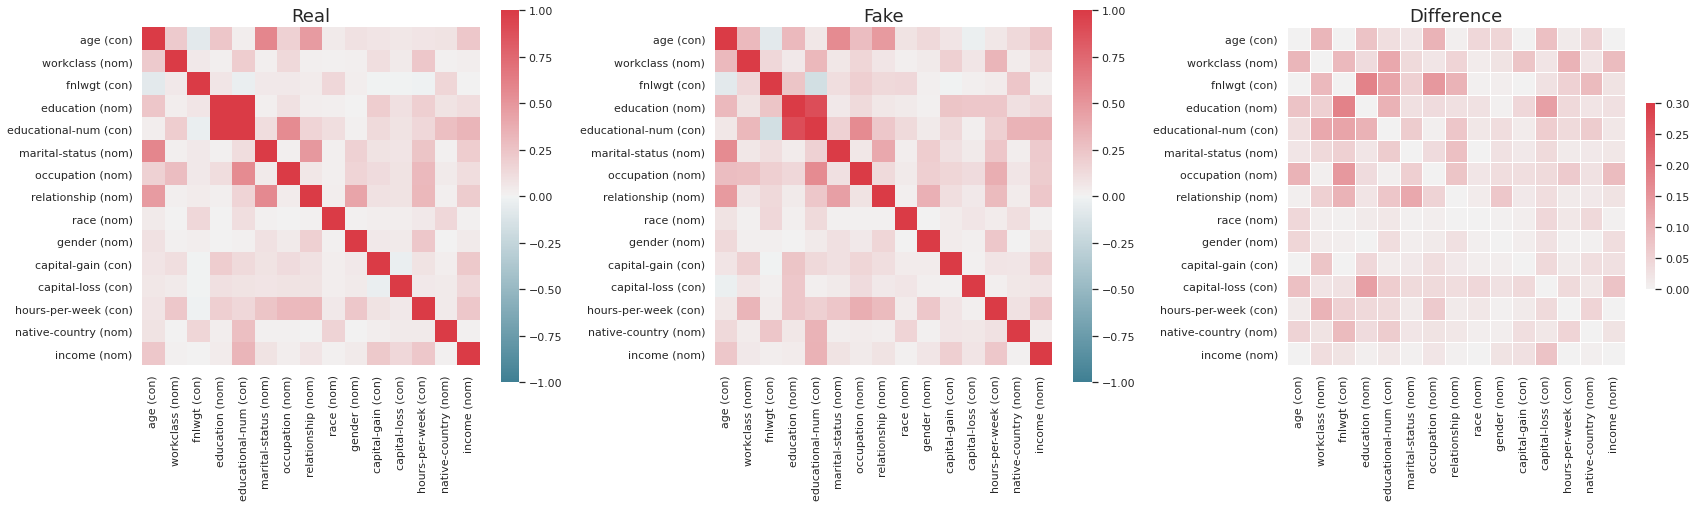

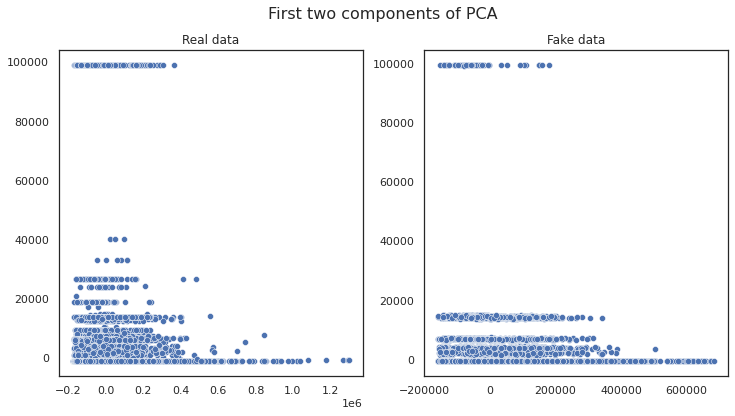

In [ ]:
table_evaluator = TableEvaluator(real_data, synthetic_data_gan)
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='income')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.7753   0.8052              0.6194
DecisionTreeClassifier_real   0.8036   0.7732              0.6209
LogisticRegression_fake       0.7414   0.8128              0.7248
LogisticRegression_real       0.7860   0.8111              0.7528
MLPClassifier_fake            0.7813   0.7713              0.9187
MLPClassifier_real            0.7978   0.7864              0.9015
RandomForestClassifier_fake   0.8102   0.8498              0.7420
RandomForestClassifier_real   0.8478   0.8193              0.7521

Privacy results:
                                           result
Duplicate rows between sets (real/fake)  (101, 0)
nearest neighbor mean                      1.6873
nearest neighbor std                       0.8129

Miscellaneous results:
                                  Result
Co

In [ ]:
#from sdv.evaluation import evaluate
#evaluate(synthetic_data_gan,real_data_subset)
#evaluate(synthetic_data_gan,real_data)

In [ ]:
#from sdv.metrics.tabular import CSTest, KSTest

#CSTest.compute(real_data_subset, synthetic_data_gan)
#CSTest.compute(real_data, synthetic_data_gan)

ImportError: ignored

In [ ]:
#KSTest.compute(real_data_subset, synthetic_data_gan)
#KSTest.compute(real_data, synthetic_data_gan)

NameError: ignored

In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
    synthetic_data_gan[i] = le.fit_transform(synthetic_data_gan[i].astype(str))

synthetic_data_gan.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,20,4,433184,12,14,4,9,1,4,0,0,0,20,39,0
1,21,0,267864,9,13,5,0,1,2,1,0,0,40,39,0
2,37,4,255321,6,6,0,6,4,4,0,1,0,40,39,0
3,46,6,71493,8,11,2,4,0,4,1,15,0,50,39,0
4,47,4,150837,11,9,0,7,4,4,0,0,0,29,39,0


In [ ]:
synthetic_data_gan['income'].value_counts(normalize=True)

0    0.760718
1    0.239282
Name: income, dtype: float64

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(synthetic_data_gan.drop('income', 1))
y = synthetic_data_gan['income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     11147
           1       0.50      0.81      0.62      3506

    accuracy                           0.76     14653
   macro avg       0.71      0.78      0.72     14653
weighted avg       0.82      0.76      0.78     14653



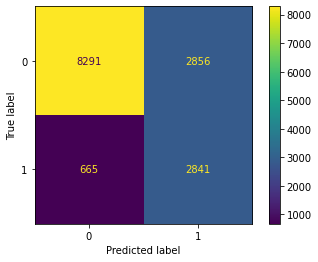

In [ ]:
lgb_gan_synthetic = lgb.LGBMClassifier(class_weight='balanced')
lgb_gan_synthetic.fit(X_train, y_train)

y_pred = lgb_gan_synthetic.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))
plot_confusion_matrix(lgb_gan_synthetic, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.6174073671628816

Evaluate lgb_gan_synthetic on original dataset

In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:


    #real_data_subset[i] = le.fit_transform(real_data_subset[i].astype(str))
    real_data[i] = le.fit_transform(real_data[i].astype(str))

real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,12,3,2,1,0,0,40,33,0
1,38,4,89814,3,9,2,10,0,4,1,0,0,50,33,0
2,28,2,336951,13,12,2,3,0,4,1,0,0,40,33,1
3,44,4,160323,7,10,2,12,0,2,1,7688,0,40,33,1
4,18,0,103497,7,10,4,0,3,4,0,0,0,30,33,0


In [ ]:
scaler = StandardScaler()

X_evaluate = scaler.fit_transform(real_data.drop('income', 1))
y_evaluate = real_data['income'].values

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37155
           1       0.52      0.79      0.63     11687

    accuracy                           0.78     48842
   macro avg       0.72      0.78      0.73     48842
weighted avg       0.82      0.78      0.79     48842



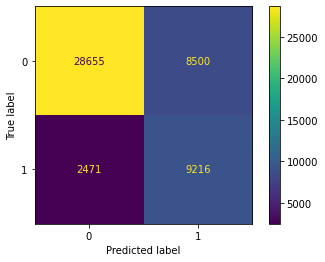

In [ ]:
y_pred = lgb_gan_synthetic.predict(X_evaluate)

# evaluation
print(classification_report(y_evaluate, y_pred))
plot_confusion_matrix(lgb_gan_synthetic, X_evaluate, y_evaluate)
plt.show()

In [ ]:
f1_score(y_evaluate, y_pred)

0.6268748086929905

**Build VAE**

In [ ]:
#real_data_subset = real_data.iloc[:15000]
#real_data_subset.head()

In [ ]:
#real_data_subset['income'].value_counts(normalize=True)

In [ ]:
#real_data_subset['income'].value_counts()

In [ ]:
#real_data.head()

In [ ]:
model_vae = TVAE(
              epochs=500,
              batch_size=200,
              compress_dims=(256, 256, 256),
              decompress_dims=(256, 256, 256)
            )

In [ ]:
#model_vae.fit(real_data_subset)
model_vae.fit(real_data)

In [ ]:
#synthetic_data_vae = model_vae.sample(num_rows=15000)
#synthetic_data_vae.head()

In [ ]:
#synthetic_data_vae['income'].value_counts(normalize=True)

In [ ]:
from sdv.sampling import Condition

In [ ]:
condition_0 = Condition({      
        'income': '<=50K'
          }, num_rows=37155)

condition_1 = Condition({      
        'income': '>50K'
          }, num_rows=11687)

In [ ]:
vae_0 = model_vae.sample_conditions(conditions=[condition_0])
vae_1 = model_vae.sample_conditions(conditions=[condition_1])

Sampling conditions: 100%|██████████| 11687/11687 [00:02<00:00, 5654.25it/s]


In [ ]:
synthetic_data_vae = pd.concat([vae_0,vae_1])
synthetic_data_vae.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,26,Private,28642,Masters,14,Never-married,Tech-support,Not-in-family,White,Female,0,0,35,United-States,<=50K
1,35,Self-emp-not-inc,28894,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,35,United-States,<=50K
2,25,Private,189178,Assoc-voc,11,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,28,Private,99886,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,2818,0,50,United-States,<=50K
4,30,Private,234153,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
synthetic_data_vae['income'].value_counts(normalize=True)

<=50K   0.7607
>50K    0.2393
Name: income, dtype: float64

In [ ]:
synthetic_data_vae['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
#from sdv.evaluation import evaluate
#evaluate(synthetic_data_vae,real_data_subset)

0.7231231755329275

In [ ]:
#from sdv.metrics.tabular import CSTest, KSTest
#CSTest.compute(real_data_subset, synthetic_data_vae)

ImportError: ignored

In [ ]:
#KSTest.compute(real_data_subset, synthetic_data_vae)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('drive')

synthetic_data_vae.to_csv('/content/drive/My Drive/synthetic_data_vae_entire.csv', encoding='utf-8', index=False)

Mounted at drive


Now, let’s check just how similar the synthetic data is to the real data. For this, we will use table_evaluator⁷ to visualize the difference between the fake and real data.

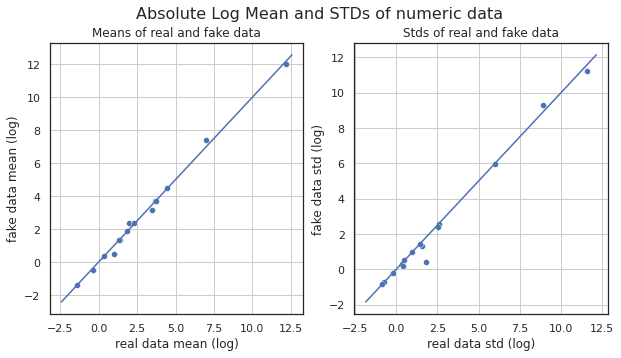

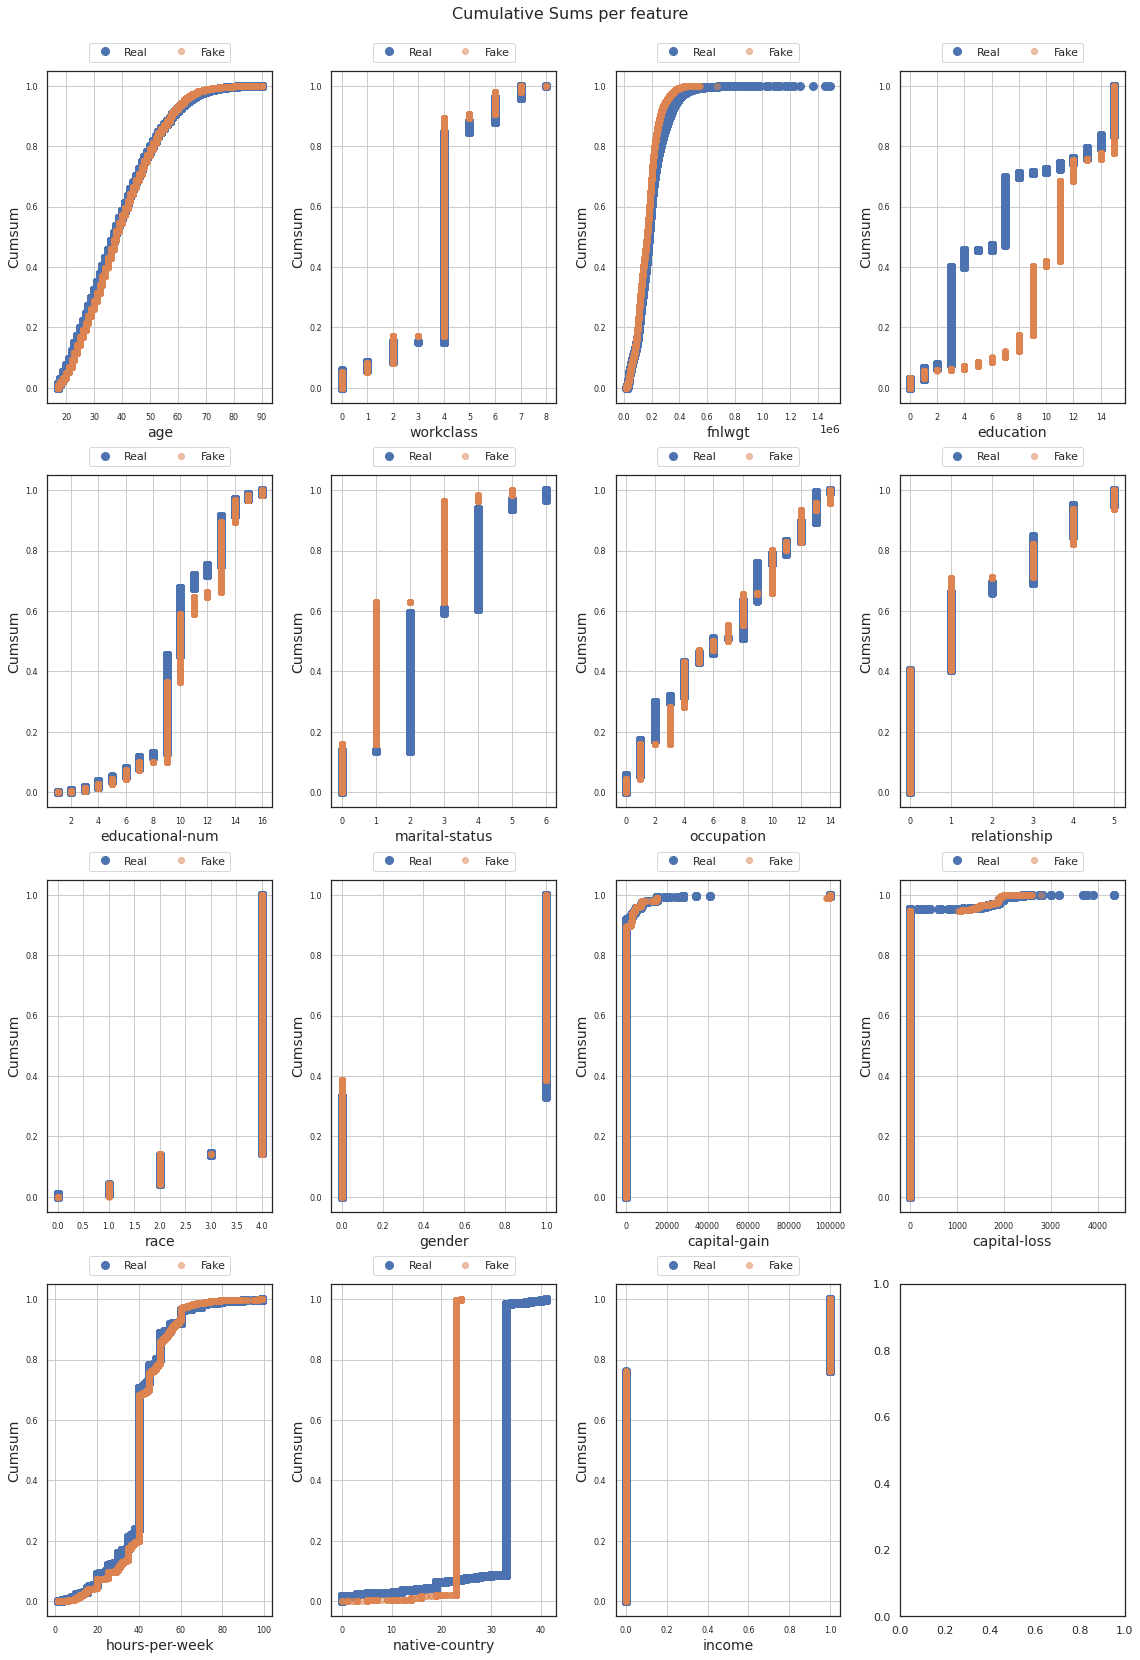

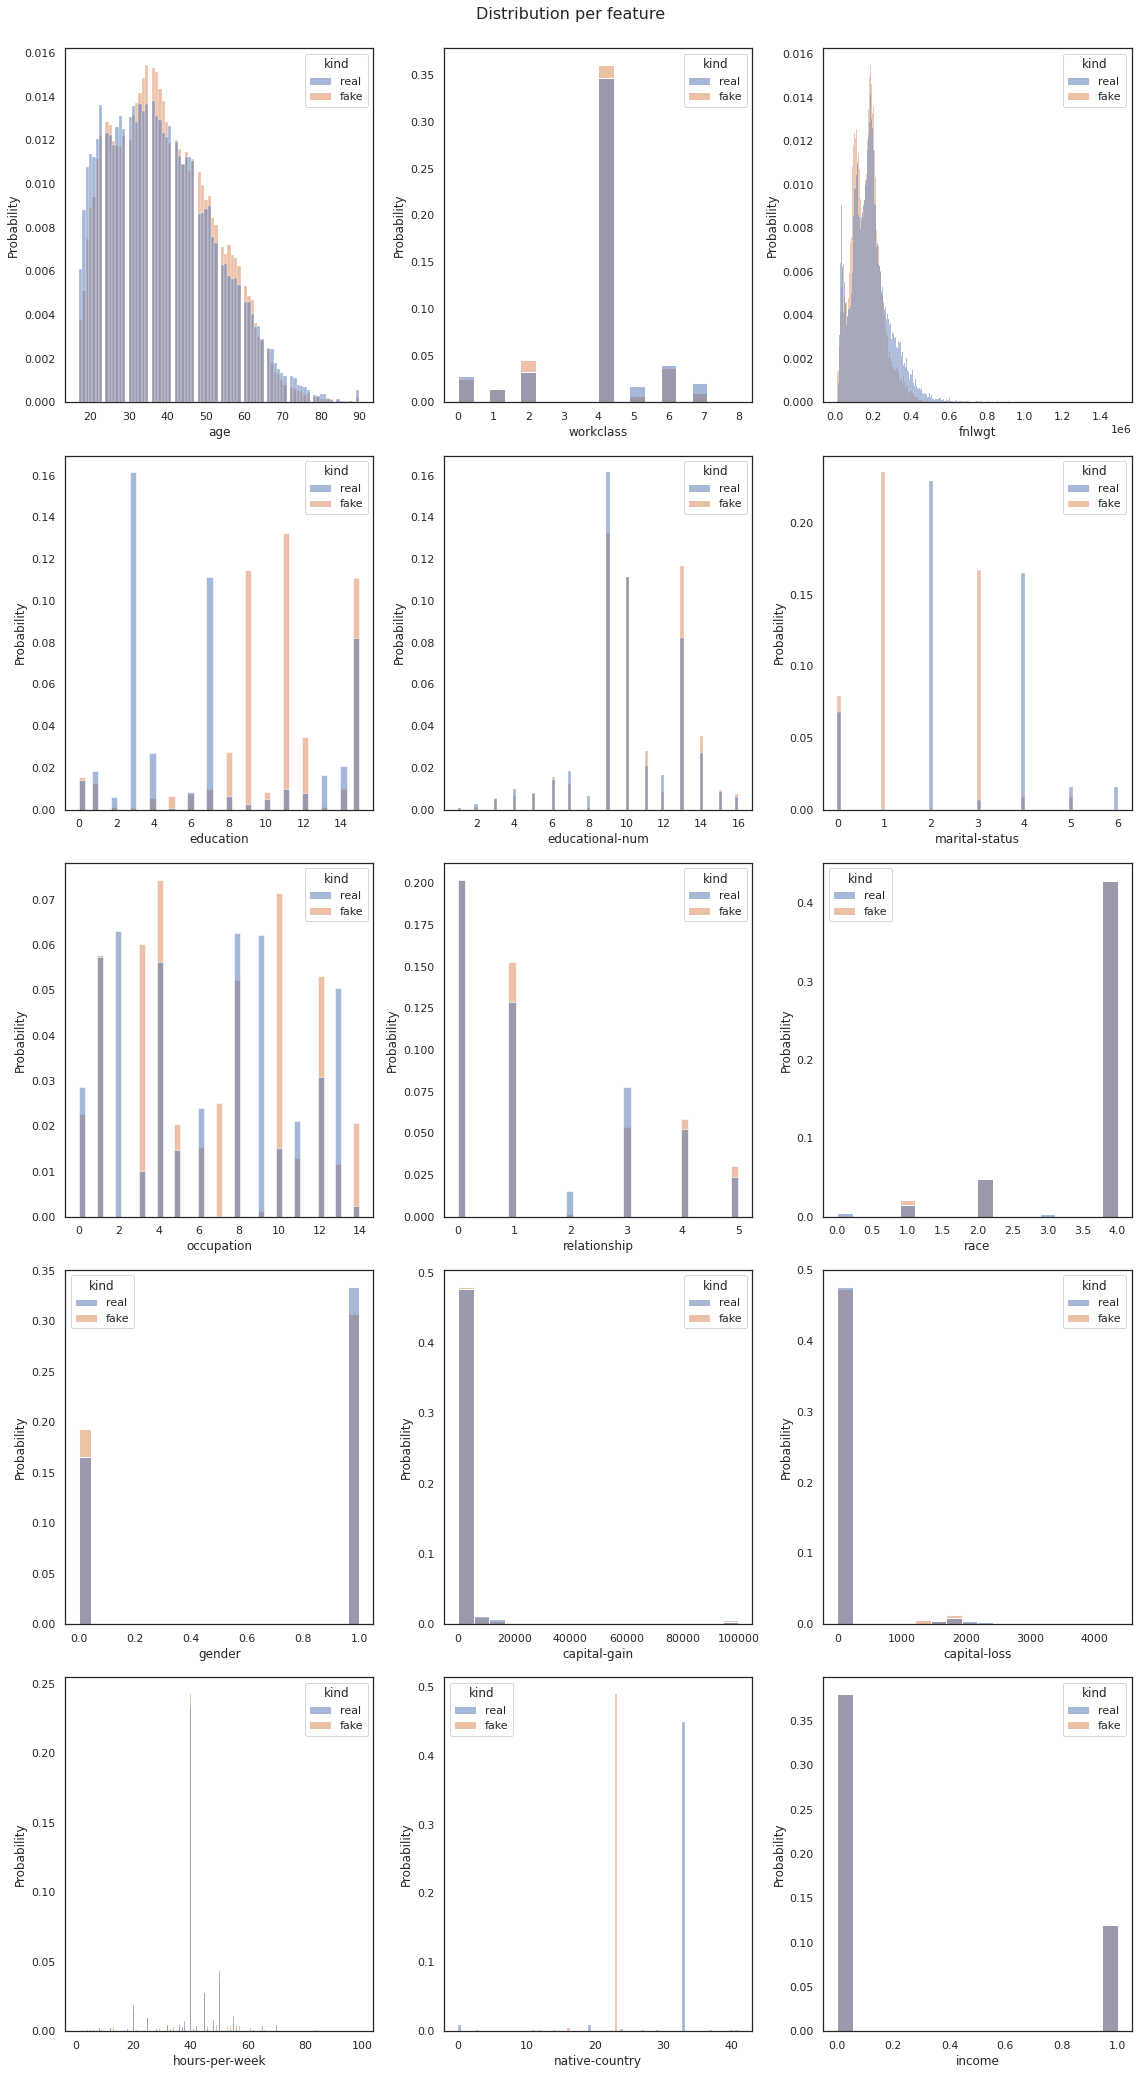

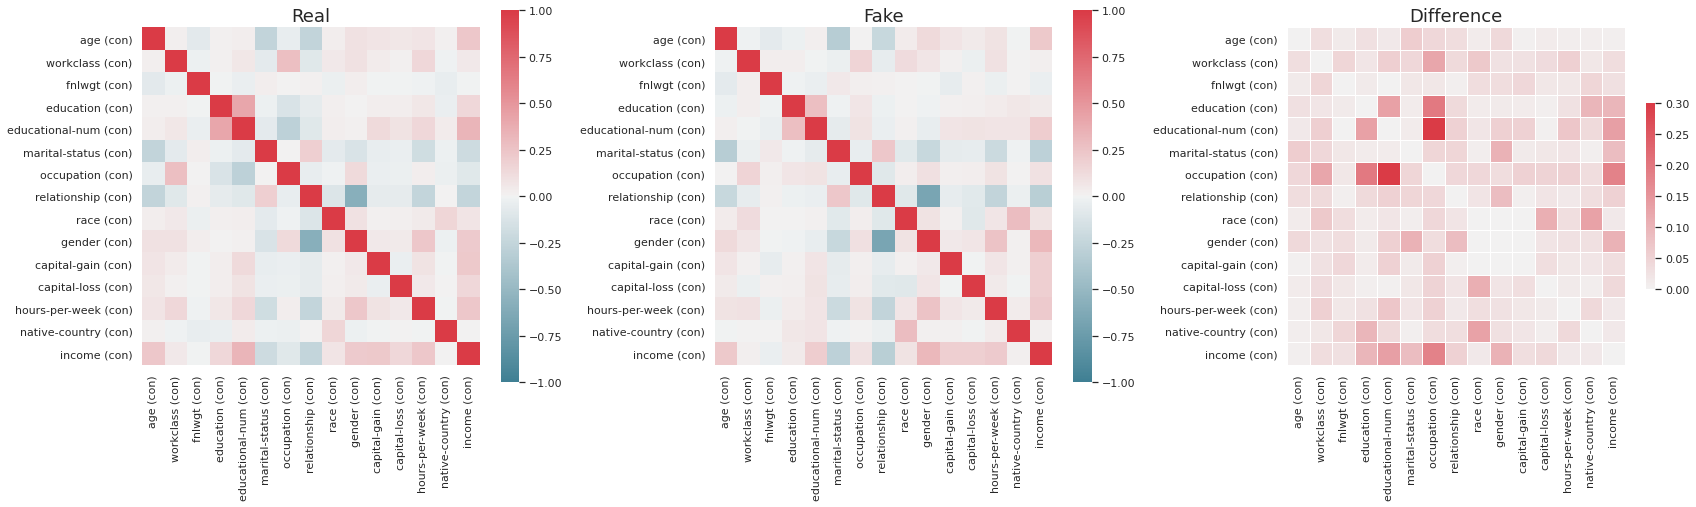

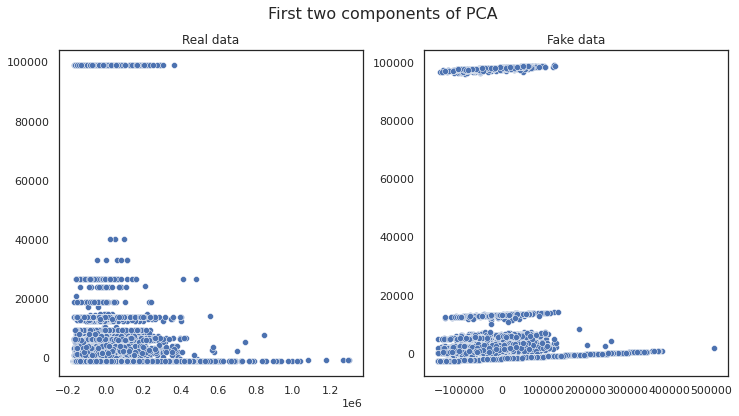

In [ ]:
table_evaluator = TableEvaluator(real_data, synthetic_data_vae)
table_evaluator.visual_evaluation()

In [ ]:
table_evaluator.evaluate(target_col='income')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.7654   0.8419              0.6205
DecisionTreeClassifier_real   0.8217   0.8056              0.6679
LogisticRegression_fake       0.7615   0.7724              0.8071
LogisticRegression_real       0.7913   0.7611              0.8797
MLPClassifier_fake            0.7562   0.7961              0.8409
MLPClassifier_real            0.7860   0.7966              0.8803
RandomForestClassifier_fake   0.8197   0.8649              0.7392
RandomForestClassifier_real   0.8551   0.8129              0.7393

Privacy results:
                                           result
Duplicate rows between sets (real/fake)  (101, 0)
nearest neighbor mean                      1.4141
nearest neighbor std                       0.6951

Miscellaneous results:
                                  Result
Co

In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
    synthetic_data_vae[i] = le.fit_transform(synthetic_data_vae[i].astype(str))

synthetic_data_vae.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,26,4,28642,4,14,3,5,1,4,0,0,0,35,16,0
1,35,6,28894,7,10,1,10,0,4,1,0,0,35,16,0
2,25,4,189178,14,11,3,8,3,4,1,0,0,40,16,0
3,28,4,99886,7,10,1,1,0,4,1,2818,0,50,16,0
4,30,4,234153,3,9,3,9,1,4,1,0,0,40,16,0


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(synthetic_data_vae.drop('income', 1))
y = synthetic_data_vae['income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     11147
           1       0.61      0.94      0.74      3506

    accuracy                           0.84     14653
   macro avg       0.80      0.88      0.82     14653
weighted avg       0.89      0.84      0.85     14653



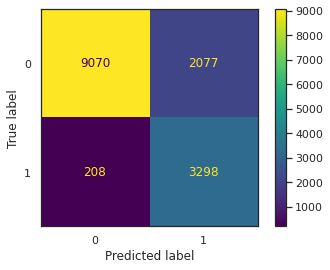

In [ ]:
lgb_synthetic_vae = lgb.LGBMClassifier(class_weight='balanced')
lgb_synthetic_vae.fit(X_train, y_train)

y_pred = lgb_synthetic_vae.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))
plot_confusion_matrix(lgb_synthetic_vae, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.7427091543745074

Evaluate lgb_synthetic_vae on original dataset

In [ ]:
real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,12,3,2,1,0,0,40,33,0
1,38,4,89814,3,9,2,10,0,4,1,0,0,50,33,0
2,28,2,336951,13,12,2,3,0,4,1,0,0,40,33,1
3,44,4,160323,7,10,2,12,0,2,1,7688,0,40,33,1
4,18,0,103497,7,10,4,0,3,4,0,0,0,30,33,0


In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
    real_data[i] = le.fit_transform(real_data[i].astype(str))

real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,4,3,2,1,0,0,40,27,0
1,38,4,89814,9,9,2,2,0,4,1,0,0,50,27,0
2,28,2,336951,5,12,2,8,0,4,1,0,0,40,27,1
3,44,4,160323,13,10,2,4,0,2,1,7688,0,40,27,1
4,18,0,103497,13,10,4,0,3,4,0,0,0,30,27,0


In [ ]:
scaler = StandardScaler()

X_evaluate = scaler.fit_transform(real_data.drop('income', 1))
y_evaluate = real_data['income'].values

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     37155
           1       0.56      0.77      0.65     11687

    accuracy                           0.80     48842
   macro avg       0.74      0.79      0.75     48842
weighted avg       0.83      0.80      0.81     48842



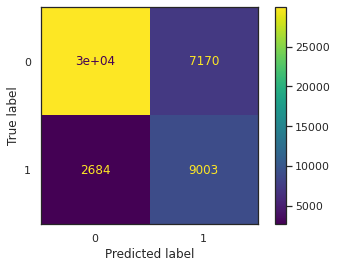

In [ ]:
y_pred = lgb_synthetic_vae.predict(X_evaluate)

# evaluation
print(classification_report(y_evaluate, y_pred))
plot_confusion_matrix(lgb_synthetic_vae, X_evaluate, y_evaluate)
plt.show()

In [ ]:
f1_score(y_evaluate, y_pred)

0.646302943287868

**Build model on original data**

In [ ]:
#real_data_subset = real_data.iloc[:15000]
#real_data_subset.head()

In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
    #real_data_subset[i] = le.fit_transform(real_data_subset[i].astype(str))
    real_data[i] = le.fit_transform(real_data[i].astype(str))

real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,9,3,2,1,0,0,40,20,0
1,38,4,89814,15,9,2,7,0,4,1,0,0,50,20,0
2,28,2,336951,11,12,2,13,0,4,1,0,0,40,20,1
3,44,4,160323,5,10,2,9,0,2,1,7688,0,40,20,1
4,18,0,103497,5,10,4,0,3,4,0,0,0,30,20,0


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(real_data.drop('income', 1))
y = real_data['income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     11147
           1       0.60      0.87      0.71      3506

    accuracy                           0.83     14653
   macro avg       0.78      0.84      0.79     14653
weighted avg       0.87      0.83      0.84     14653



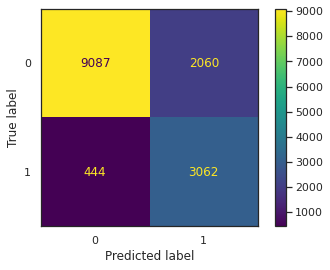

In [ ]:
lgb_orig = lgb.LGBMClassifier(class_weight='balanced')
lgb_orig.fit(X_train, y_train)

y_pred = lgb_orig.predict(X_test)

# evaluation
print(classification_report(y_test, y_pred))
plot_confusion_matrix(lgb_orig, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.7097821047751508

### **Random Forests**

In [ ]:
real_data = pd.read_csv('adult.csv')
real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
real_data['capital-gain-loss'] = real_data['capital-gain'] + real_data['capital-loss']
real_data.drop(['capital-gain','capital-loss'],axis=1, inplace=True)
real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,7688
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,30,United-States,<=50K,0


In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
    #real_data_subset[i] = le.fit_transform(real_data_subset[i].astype(str))
    real_data[i] = le.fit_transform(real_data[i].astype(str))

real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-loss
0,25,4,226802,1,7,4,7,3,2,1,40,39,0,0
1,38,4,89814,11,9,2,5,0,4,1,50,39,0,0
2,28,2,336951,7,12,2,11,0,4,1,40,39,1,0
3,44,4,160323,15,10,2,7,0,2,1,40,39,1,7688
4,18,0,103497,15,10,4,0,3,4,0,30,39,0,0


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(real_data.drop('income', 1))
y = real_data['income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
#X = real_data.drop('income', 1)
#y = real_data['income'].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
#Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split:
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Minimum number of samples required to split a node :
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node :
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
#Setting the random grid :
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
random_forests = RandomForestClassifier(class_weight='balanced')

random_forests_orig = RandomizedSearchCV(estimator = random_forests, param_distributions = param_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = -1)

In [ ]:
random_forests_orig.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
random_forests_orig.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
random_forests = RandomForestClassifier( n_estimators = 1000,
                                         min_samples_split = 2,
                                         min_samples_leaf = 1,
                                         max_features = 'sqrt',
                                         max_depth = 25,
                                         random_state = 101)

In [ ]:
random_forests = random_forests.fit(X_train,y_train)
y_pred=random_forests.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11147
           1       0.76      0.64      0.69      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.86      0.86     14653



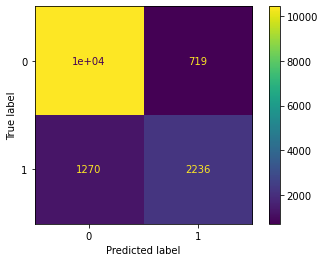

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))
plot_confusion_matrix(random_forests, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.6921529175050302

In [ ]:
synthetic_data_vae = pd.read_csv('synthetic_data_vae_entire.csv')
synthetic_data_vae.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,26,4,28642,4,14,3,5,1,4,0,0,0,35,16,0
1,35,6,28894,7,10,1,10,0,4,1,0,0,35,16,0
2,25,4,189178,14,11,3,8,3,4,1,0,0,40,16,0
3,28,4,99886,7,10,1,1,0,4,1,2818,0,50,16,0
4,30,4,234153,3,9,3,9,1,4,1,0,0,40,16,0


In [ ]:
synthetic_data_vae['capital-gain-loss'] = synthetic_data_vae['capital-gain'] + synthetic_data_vae['capital-loss']
synthetic_data_vae.drop(['capital-gain','capital-loss'],axis=1, inplace=True)
synthetic_data_vae.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-loss
0,26,4,28642,4,14,3,5,1,4,0,35,16,0,0
1,35,6,28894,7,10,1,10,0,4,1,35,16,0,0
2,25,4,189178,14,11,3,8,3,4,1,40,16,0,0
3,28,4,99886,7,10,1,1,0,4,1,50,16,0,2818
4,30,4,234153,3,9,3,9,1,4,1,40,16,0,0


In [ ]:
le = preprocessing.LabelEncoder()
for i in ['workclass','education','marital-status','occupation','relationship','race','gender','native-country','income']:
    #real_data_subset[i] = le.fit_transform(real_data_subset[i].astype(str))
    synthetic_data_vae[i] = le.fit_transform(synthetic_data_vae[i].astype(str))

synthetic_data_vae.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-loss
0,26,4,28642,10,14,3,10,1,4,0,35,8,0,0
1,35,6,28894,13,10,1,2,0,4,1,35,8,0,0
2,25,4,189178,6,11,3,13,3,4,1,40,8,0,0
3,28,4,99886,13,10,1,1,0,4,1,50,8,0,2818
4,30,4,234153,9,9,3,14,1,4,1,40,8,0,0


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(synthetic_data_vae.drop('income', 1))
y = synthetic_data_vae['income'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [ ]:
#Number of trees in random forest:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

#Number of features to consider at every split:
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Minimum number of samples required to split a node :
min_samples_split = [2, 5, 10, 15, 100]

#Minimum number of samples required at each leaf node :
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
#Setting the random grid :
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
random_forests = RandomForestClassifier(class_weight='balanced')

random_forests_synthetic = RandomizedSearchCV(estimator = random_forests, param_distributions = param_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, 
                               random_state=42, n_jobs = -1)

In [ ]:
random_forests_synthetic.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
random_forests_synthetic.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [ ]:
random_forests_synthetic = RandomForestClassifier( n_estimators = 1000,
                                         min_samples_split = 2,
                                         min_samples_leaf = 1,
                                         max_features = 'sqrt',
                                         max_depth = 25,
                                         random_state = 101)

In [ ]:
random_forests_synthetic = random_forests_synthetic.fit(X_train,y_train)
y_pred=random_forests_synthetic.predict(X_test)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     11147
           1       0.74      0.70      0.72      3506

    accuracy                           0.87     14653
   macro avg       0.83      0.81      0.82     14653
weighted avg       0.87      0.87      0.87     14653



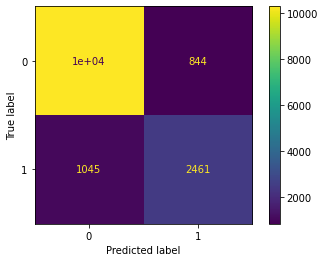

In [ ]:
# evaluation
print(classification_report(y_test, y_pred))
plot_confusion_matrix(random_forests_synthetic, X_test, y_test)
plt.show()

In [ ]:
f1_score(y_test, y_pred)

0.7226545294376744

In [ ]:
real_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,capital-gain-loss
0,25,4,226802,1,7,4,7,3,2,1,40,39,0,0
1,38,4,89814,11,9,2,5,0,4,1,50,39,0,0
2,28,2,336951,7,12,2,11,0,4,1,40,39,1,0
3,44,4,160323,15,10,2,7,0,2,1,40,39,1,7688
4,18,0,103497,15,10,4,0,3,4,0,30,39,0,0


In [ ]:
scaler = StandardScaler()

X_evaluate = scaler.fit_transform(real_data.drop('income', 1))
y_evaluate = real_data['income'].values

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     37155
           1       0.68      0.41      0.51     11687

    accuracy                           0.81     48842
   macro avg       0.76      0.67      0.70     48842
weighted avg       0.80      0.81      0.80     48842



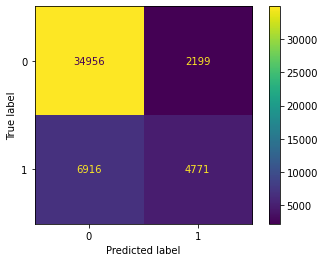

In [ ]:
y_pred = random_forests_synthetic.predict(X_evaluate)

# evaluation
print(classification_report(y_evaluate, y_pred))
plot_confusion_matrix(random_forests_synthetic, X_evaluate, y_evaluate)
plt.show()

In [ ]:
f1_score(y_evaluate, y_pred)

0.5114434260599239